In [1]:
import nltk
import matplotlib.pyplot as plt

In [2]:
text1 = """As the sun sets behind the mountains, painting the sky in hues of orange and pink. a gentle breeze rustles through the trees, carrying with it the sweet scent of blooming flowers."""
text = """Dogs are amazing pets. They come in all shapes and sizes, from tiny Chihuahuas to big fluffy Golden Retrievers. 
Some dogs love to play fetch, while others prefer lounging on the couch. One thing is for sure, though - dogs bring joy to our lives. 
They wag their tails when they're happy and give us sloppy kisses. Taking care of a dog is a big responsibility, but it's worth it. 
They rely on us for food, water, and love. 
So next time you see a dog, don't forget to give them a pat on the head and a scratch behind the ears."""

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [5]:
word1 = word_tokenize(text)
sent1 = sent_tokenize(text)

In [6]:
sent1

['Dogs are amazing pets.',
 'They come in all shapes and sizes, from tiny Chihuahuas to big fluffy Golden Retrievers.',
 'Some dogs love to play fetch, while others prefer lounging on the couch.',
 'One thing is for sure, though - dogs bring joy to our lives.',
 "They wag their tails when they're happy and give us sloppy kisses.",
 "Taking care of a dog is a big responsibility, but it's worth it.",
 'They rely on us for food, water, and love.',
 "So next time you see a dog, don't forget to give them a pat on the head and a scratch behind the ears."]

### **HANDLING STOPWORDS**

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

In [9]:
len(stopwords.words('english'))

179

In [10]:
win = 'Dogs are amazing pets.'
p = win.split()
p

['Dogs', 'are', 'amazing', 'pets.']

In [11]:
text_without_stopwords = []
for sent in sent1:
    split_sent = sent.split()
    for i in stopwords.words('english'):
        if i in split_sent:
            split_sent.remove(i)
    new_sent = ' '.join(split_sent)        
    text_without_stopwords.append(new_sent)
    

new_text = ' '.join(text_without_stopwords)
            

In [12]:
new_text

"Dogs amazing pets. They come shapes sizes, tiny Chihuahuas big fluffy Golden Retrievers. Some dogs love play fetch, others prefer lounging couch. One thing sure, though - dogs bring joy lives. They wag tails they're happy give us sloppy kisses. Taking care dog a big responsibility, worth it. They rely us food, water, love. So next time see dog, forget give a pat head a scratch behind the ears."

### **SENTIMENT ANALYSIS**

> Lemmatizer and Stemmer gets the root word form a tensed word, eg the root word of 'Going' (which is present continuous tense) is 'Go'. Lemmatizer and stemmer extracts the root from a tensed word.
___

In [13]:
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [1]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer, SentimentAnalyzer

In [3]:
import pandas as pd

In [13]:
sa = SentimentAnalyzer()
sia = SentimentIntensityAnalyzer()

intensity = sia.polarity_scores('LIONS ARE CRUEL ANIMALS')
df  = pd.DataFrame(intensity, index=['value']).T

In [9]:
intensity.keys()

dict_keys(['neg', 'neu', 'pos', 'compound'])

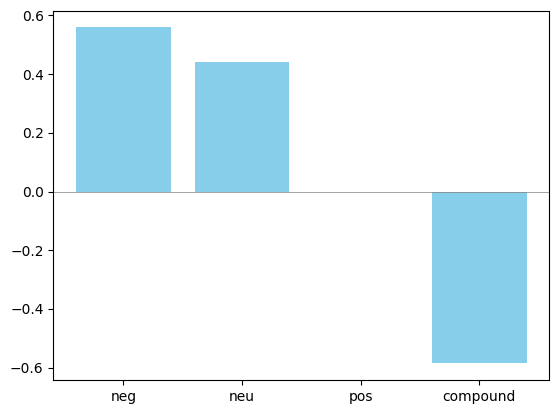

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


keys = list(intensity.keys())
values = list(intensity.values())



# Plotting the bar chart
plt.bar(keys, values, color='skyblue')

plt.axhline(0, color='gray', linewidth=0.5)


In [12]:
sns.barplot(x=intensity.keys(), y=intensity.values())

AttributeError: 'bool' object has no attribute 'all'

In [17]:
import spacy

In [20]:
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

In [21]:
words = ['eating', 'ate', 'eats', 'ability', 'able', 'compare', 'sustainability', 'rafting']

for word in words:
    print(word, ' | ', stemmer.stem(word), ' | ', lemma.lemmatize(word))

eating  |  eat  |  eating
ate  |  ate  |  ate
eats  |  eat  |  eats
ability  |  abil  |  ability
able  |  abl  |  able
compare  |  compar  |  compare
sustainability  |  sustain  |  sustainability
rafting  |  raft  |  rafting


In [22]:
nlp = spacy.load('en_core_web_sm')

doc = nlp('eating food feels much better at home')

for token in doc:
    print(token, ' | ', token.lemma_)

eating  |  eat
food  |  food
feels  |  feel
much  |  much
better  |  well
at  |  at
home  |  home


### **CUSTOMIZING NLP RULES**

In [23]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [24]:
ar = nlp.get_pipe('attribute_ruler')
ar.add([[{'TEXT':'Bro'}],[{'TEXT':'Brah'}]], {'LEMMA':'BROTHER'})
doc = nlp('Bro, you wanna go? Brah, don\'t say no! I am exhausted')

for token in doc:
    print(token, '|', token.lemma_)

Bro | BROTHER
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | BROTHER
, | ,
do | do
n't | not
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


#### **NAME ENTITY RECOGNIZATION (NER)**

In [26]:
nlp = spacy.load('en_core_web_sm')

In [35]:
doc = nlp('Tesla Inc wants to buy Twitter for $45 billion')

for ent in doc.ents:
    print(ent.text,'|',ent.label_,'|', spacy.explain(ent.label_))

Tesla Inc | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **TOKENIZATION**

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(text1)

In [ ]:
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(text1)

print(tokenized_sent)

['As the sun sets behind the mountains, painting the sky in hues of orange and pink.', 'a gentle breeze rustles through the trees, carrying with it the sweet scent of blooming flowers.']


### **REMOVING STOP WORDS**

In [ ]:
from nltk.probability import FreqDist

count = FreqDist(tokenized_word)
print(count.most_common(3))

[('the', 5), (',', 2), ('of', 2)]


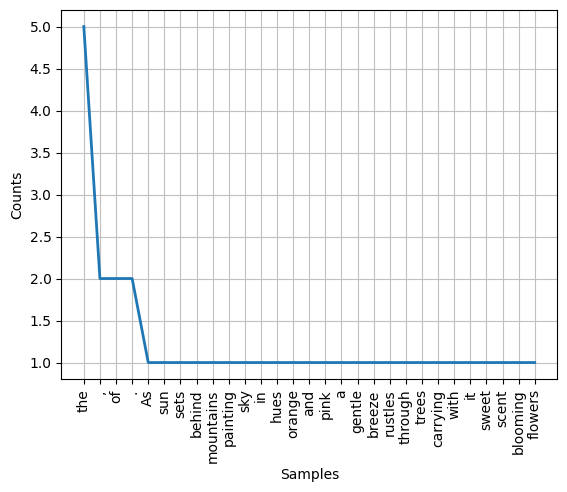

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
count.plot(30)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
without_stop_words = []
for word in tokenized_word:
    if word not in stop_words:
        without_stop_words.append(word)

In [ ]:
print(without_stop_words)

['As', 'sun', 'sets', 'behind', 'mountains', ',', 'painting', 'sky', 'hues', 'orange', 'pink', '.', 'gentle', 'breeze', 'rustles', 'trees', ',', 'carrying', 'sweet', 'scent', 'blooming', 'flowers', '.']


In [ ]:
stop_words_in_tokenized_words = set(tokenized_word)-set(without_stop_words)

print(stop_words_in_tokenized_words)

{'with', 'a', 'in', 'through', 'it', 'the', 'and', 'of'}


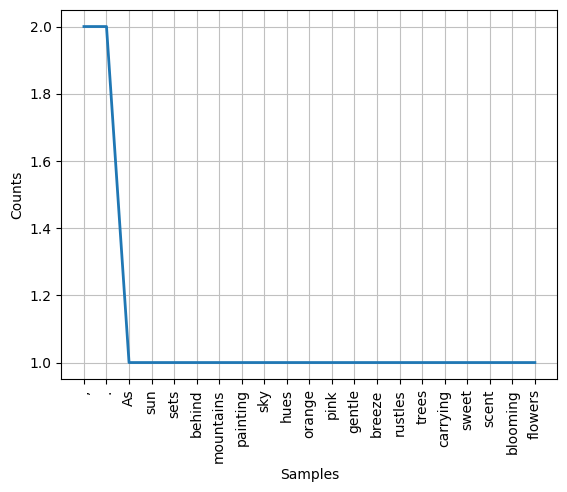

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
counts = FreqDist(without_stop_words)
counts.plot(30)